**Declaration de specification de systeme** 

Terminaux, serveur de calculation, serveur de stockage, reseaux

In [65]:
# Ce classe est utilise pour definir les informations de terminal utilise. Pour le service Treebal, le terminal qu'on utilise est un portable (smartphone)

class terminaux:
    def __init__(self):
        self.duree_globale = 180  #Durée d'usage globale (mn)
        self.temp_ecrit = 30 #Temps d'écriture (sec)
        self.temp_consul = 10 #Temps de consultation moyenne (sec)
        self.taille_mess = 300 #Taille d'un message (octets)
        self.consom_annu = 3.9 #Conso annuelle smartphone (kWh)
        self.n_destin = 1 #Nombre de destinataires
        self.duree_vie = 3 #Durée de vie smartphone (years)
        self.taille_PJ = 1000 #Taille Pièce jointe (koctets)
        self.percent_PJ = 0 #% de msg avec Pièce Jointe

    def set_n_destin(self, x):
        self.n_destin = x

    def set_percent_PJ(self, x):
        self.percent_PJ = x
    
    def set_duree_vie(self, x):
        self.duree_vie = x

    def set_duree_globale(self, x):
        self.duree_globale = x
    
smartphone = terminaux()


In [66]:
class server_calcul :
    def __init__(self):
        self.n_vCPU = 24
        self.n_RAM = 96
        self.Av_util = 0.5 #Average server utilization
        self.watts_vCPU = 3.8 #watts /vcpu @50% de charge
        self.watts_Go = 0.41 #watt /Go (RAM) @50% de charge
        self.die_size = 0.245 #
        self.die_size_vCPU = 0.12 #Die Size / vCPU (cm2)
        self.die_size_Go = 0.558 #Die Size / Go (cm2) // RAM
        self.n_vCPU_server = 36 #vCPU/server
        self.n_vCPU_CPU = 32 #vCPU/ CPU
        self.Go_die_size = 1 / self.die_size_Go #Go RAM/vCPU (Pour AWS Lambda)
        self.Go_RAM_module = 32 #Go / RAM Module
        self.die_size_vCPU = 0.1225 #Die size (cm2) / vCPU
        self.storage_SSD = 600 #Storage SSD (Go)
        self.n_power_unit = 6 
        self.n_blade = 16
        
calcul = server_calcul()


In [67]:
class server_stockage :
    def __init__(self):
        self.n_vCPU = 4 #nombre de vCPU
        self.n_RAM = 15 #RAM (Go)
        self.storage_SSD = 150 #Storage SSD (Go)
        self.HDD_capacity = 10
        self.SSD_capacity = 6 
        self.Av_watts_HDD = 6.5 #
        self.HDD_consom = self.Av_watts_HDD / self.HDD_capacity #HDD conso (Wh) / To.hour
        self.Av_watts_SSD = 6 #SSD Capacity (To)
        self.SSD_consom = self.Av_watts_SSD / self.SSD_capacity #SSD conso (Wh) / To.hour
        self.Av_SSD_density = 50.6 #Go /Die Size (cm2)  (SSD)

stockage = server_stockage()


In [68]:
class donne_generales:
    def __init__(self):
        self.total_mess_jour = 13000 #Total messages / jour
        self.max_mess_jour = 429000 #Nb max messages / jour
        self.max_node_supp = 71500 #Nb max message / Node supplémentaire
        self.ADSL = 40
        self.four_G = 100 - self.ADSL
        self.PUE = 1.09
        self.duree_vie = 4

    def set_total_mess_jour(self,x):
        self.total_mess_jour = x

donne = donne_generales()

**Tableau de Reference de donnes**

On cherche des donnes necessaires d'apres la specification de systeme.

In [69]:
import pandas as pd
#On cree un tableau qui stocker tous les donnes par rapport a des emissions (par type)
#Reference : Boavizta, ADEME, TheGreen
tableau = {
    "Polution_Type" : ["ADP", "CC", "PE"],
    "CPU" : [0.0204, 9.14, 156],
    "CPU_Die" : [0.00000058, 1.97, 26.5],
    "RAM_bar" : [0.00169, 5.22, 74],
    "RAM_Die" : [0.000063, 2.2, 27.3],
    "SSD" : [0.000563, 6.34, 76.9],
    "SSD_Die" : [0.000063, 2.2, 27.3],
    "HDD" : [0.00025, 31.1, 276],
    "Motherboard" : [0.00369, 66.1, 836],
    "Rack_server" : [0.0202, 150, 2200],
    "Blade_16blade" : [0.432, 880, 12700],
    "Blade_server" : [0.000672, 30.9, 435],
    "Server_Assembly" : [0.00000141, 6.68, 68.6],
    "Power_Supply_Unit" : [0.0083, 24.3, 352],
    "Electricity_France" : [0.000000049, 0.081, 9.3],
    "Electricity_Belgique" : [0.000000034, 0.26, 9],
    "Electricity_Europe" : [0.000000072, 0.53, 8.7],
    "Smartphone" : [0.002955, 82.73, 1093.5],
    "Fixed_network" : [0.000000557, 0.0307, 0.909],
    "Mobile" : [0.000000851, 0.096, 2.91]
}

df = pd.DataFrame(tableau) #Create the table 

**Partie Fabrication**

In [70]:
#Fabrication en generale

class Fabrication:
    def __init__(self, type, server = calcul, storage = stockage):
        #Declaration
        self.CPU_die = df.loc[df['Polution_Type'] == type, 'CPU_Die'].values[0]
        self.CPU = df.loc[df['Polution_Type'] == type, 'CPU'].values[0]
        self.RAM_bar = df.loc[df['Polution_Type'] == type, 'RAM_bar'].values[0]
        self.RAM_Die= df.loc[df['Polution_Type'] == type, 'RAM_Die'].values[0]
        self.SSD_Die= df.loc[df['Polution_Type'] == type, 'SSD_Die'].values[0]
        self.SSD= df.loc[df['Polution_Type'] == type, 'SSD'].values[0]
        self.motherboard = df.loc[df['Polution_Type'] == type, 'Motherboard'].values[0]
        self.server_assem = df.loc[df['Polution_Type'] == type, 'Server_Assembly'].values[0]
        self.power_unit = df.loc[df['Polution_Type'] == type, 'Power_Supply_Unit'].values[0]
        self.blade_server = df.loc[df['Polution_Type'] == type, 'Blade_server'].values[0]
        self.blade_slots = df.loc[df['Polution_Type'] == type, 'Blade_16blade'].values[0]
        
        #Terminal
        self.terminal= df.loc[df['Polution_Type'] == type, 'Smartphone'].values[0]

        #Reseau
        self.reseau = 0

        #Calcul
        self.calcul_CPU = max (1 , server.n_vCPU // server.n_vCPU_CPU) * ((server.die_size_vCPU*server.n_vCPU+0.491)*self.CPU_die + self.CPU)
        self.calcul_RAM = max (1, server.n_RAM // server.Go_RAM_module)*(min(server.n_RAM, server.Go_RAM_module)/server.Go_die_size*self.RAM_Die + self.RAM_bar)
        self.calcul_SSD = server.storage_SSD / storage.Av_SSD_density * self.SSD_Die + self.SSD
        self.calcul_total = server.n_vCPU/server.n_vCPU_server*(self.motherboard+self.server_assem +server.n_power_unit*self.power_unit + self.blade_server + self.blade_slots/16) + self.calcul_CPU + self.calcul_RAM + self.calcul_SSD

        #Stockage
        self.stockage_CPU = max (1 , storage.n_vCPU // server.n_vCPU_CPU) * ((server.die_size_vCPU*storage.n_vCPU+0.491)*self.CPU_die + self.CPU)
        self.stockage_RAM = max (1, storage.n_RAM // server.Go_RAM_module)*(min(storage.n_RAM, server.Go_RAM_module)/server.Go_die_size*self.RAM_Die + self.RAM_bar)
        self.stockage_SSD = storage.storage_SSD / storage.Av_SSD_density * self.SSD_Die + self.SSD
        self.stockage_total = storage.n_vCPU/server.n_vCPU_server*(self.motherboard+self.server_assem +server.n_power_unit*self.power_unit + self.blade_server + self.blade_slots/16) + self.stockage_CPU + self.stockage_RAM + self.stockage_SSD



In [71]:
#Fabrication (ADP)

class fabrication_ADP(Fabrication):
    def __init__(self, type = "ADP"):
        super().__init__(type)
    
fabrication_adp= fabrication_ADP()



In [72]:
#Fabrication (CC)

class Fabrication_CC(Fabrication):
    def __init__(self, type = "CC"):
        super().__init__(type)
    
fabrication_cc= Fabrication_CC()



In [73]:
#Fabrication (PE)

class Fabrication_PE(Fabrication):
    def __init__(self, type = "PE"):
        super().__init__(type)
    
fabrication_pe= Fabrication_PE()



**Partie Usage**

In [74]:
#Usage Generale
class Usage:
    def __init__(self, type, terminal = smartphone, data = donne, server = calcul, storage = stockage):
        
        #Declaration
        self.fixed = df.loc[df['Polution_Type'] == type, 'Fixed_network'].values[0]
        self.mobile = df.loc[df['Polution_Type'] == type, 'Mobile'].values[0]
        self.electric = (df.loc[df['Polution_Type'] == type, 'Electricity_France'].values[0])

        #Reseau
        self.reseau_fixe = data.total_mess_jour*365*(terminal.taille_mess/1000000000 + terminal.percent_PJ*terminal.taille_PJ/1000000)*data.ADSL*self.fixed
        self.reseau_mobile = data.total_mess_jour*365*(terminal.taille_mess/1000000000 + terminal.percent_PJ*terminal.taille_PJ/1000000)*data.four_G*self.mobile
        self.reseau_total = self.reseau_fixe + self.reseau_mobile
        self.test = terminal.percent_PJ

        #Terminal
        self.terminal= self.electric*terminal.consom_annu

        #Server Calcul
        self.calcul = 1.2*data.PUE*(server.n_vCPU*server.watts_vCPU + server.n_RAM * server.watts_Go + server.storage_SSD*storage.Av_watts_SSD/1000) *365*24/1000 * self.electric

        #Server Stockage
        self.stockage = 1.2*data.PUE*(storage.n_vCPU*server.watts_vCPU + storage.n_RAM * server.watts_Go + storage.storage_SSD*storage.Av_watts_SSD/1000) *365*24/1000 * self.electric


In [75]:
#Usage (ADP)
class Usage_ADP (Usage):
    def __init__(self, type = 'ADP'):
        super().__init__(type)

usage_adp = Usage_ADP()



In [76]:
#Usage (CC)
class Usage_CC (Usage):
    def __init__(self, type = 'CC'):
        super().__init__(type)

usage_cc = Usage_CC()


In [77]:
#Usage (PE)

class Usage_PE (Usage):
    def __init__(self, type = 'PE'):
        super().__init__(type)

usage_pe = Usage_PE()



**Impact Annuel de service Treebal**

Pour calculer l'impact annuel de service, on va utiliser les informations de partie fabrication et usage des equipements

In [78]:
#Impact Annuel en generale

class impact_Annuel:
    def __init__(self, type, usage, fabrication, terminal=smartphone, data = donne):
        # Declaration
        self.terminal = df.loc[df['Polution_Type'] == type, 'Smartphone'].values[0]

        # Emetteur
        self.terminal_fabrication = self.terminal / terminal.duree_vie
        self.terminal_usage = usage.terminal
        self.terminal_total = self.terminal_fabrication + self.terminal_usage

        # Reseau
        self.reseau_fabrication = fabrication.reseau
        self.reseau_usage = usage.reseau_total

        # Calcul
        self.calcul_fabrication = fabrication.calcul_total / data.duree_vie
        self.calcul_usage = usage.calcul

        # Stockage
        self.stockage_fabrication = fabrication.stockage_total / data.duree_vie
        self.stockage_usage = usage.stockage
        self.stockage_total = self.stockage_fabrication + self.stockage_usage

In [79]:
class impact_Annuel_ADP(impact_Annuel):
    def __init__(self, type = 'ADP', usage = usage_adp, fabrication = fabrication_adp):
        super().__init__(type, usage, fabrication)
        
impact_annuel_adp = impact_Annuel_ADP()



In [80]:
class impact_Annuel_CC(impact_Annuel):
    def __init__(self, type='CC', usage=usage_cc, fabrication=fabrication_cc):
        super().__init__(type, usage, fabrication)

impact_annuel_cc = impact_Annuel_CC()


In [81]:
class impact_Annuel_PE(impact_Annuel):
    def __init__(self, type = 'PE', usage = usage_pe, fabrication = fabrication_pe):
        super().__init__(type, usage, fabrication)


impact_annuel_pe = impact_Annuel_PE()


**IMPACT UF 300 caractères 1 destinataire**

In [82]:
# Impact unite fonctionnelle en generale
class impact_UF:
    def __init__(self, impact_annuel, terminal = smartphone, data = donne):

        # Emetteur
        self.emetteur_fabrication = impact_annuel.terminal_fabrication*(terminal.temp_ecrit/60/(terminal.duree_globale*365))
        self.emetteur_usage = impact_annuel.terminal_usage*(terminal.temp_ecrit/60/(terminal.duree_globale*365))
        self.emetteur_total = self.emetteur_fabrication + self.emetteur_usage

        #Reseau transmission
        self.reseau_trans_fabrication = impact_annuel_adp.reseau_fabrication / (data.total_mess_jour*365)
        self.reseau_trans_usage = impact_annuel.reseau_usage / (data.total_mess_jour*365)
        self.reseau_trans_total = self.reseau_trans_fabrication + self.reseau_trans_usage

        #Calcul
        self.calcul_fabrication = impact_annuel.calcul_fabrication / (data.total_mess_jour*365)
        self.calcul_usage = impact_annuel.calcul_usage / (data.total_mess_jour*365)
        self.calcul_total = self.calcul_fabrication + self.calcul_usage

        #Stockage
        self.stockage_fabrication = impact_annuel.stockage_fabrication / (data.total_mess_jour*365)
        self.stockage_usage = impact_annuel.stockage_usage / (data.total_mess_jour*365)
        self.stockage_total = self.stockage_fabrication + self.stockage_usage

        
        #Reseau reception
        self.reseau_recep_fabrication = terminal.n_destin*impact_annuel.reseau_fabrication / (data.total_mess_jour*365)
        self.reseau_recep_usage = terminal.n_destin*impact_annuel.reseau_usage / (data.total_mess_jour*365)
        self.reseau_recep_total = self.reseau_recep_fabrication + self.reseau_recep_usage

        # Recepteur
        self.recepteur_fabrication = terminal.n_destin*impact_annuel.terminal_fabrication*(terminal.temp_consul/60/(terminal.duree_globale*365))
        self.recepteur_usage =  terminal.n_destin*impact_annuel.terminal_usage*(terminal.temp_consul/60/(terminal.duree_globale*365))
        self.recepteur_total = self.recepteur_fabrication + self.recepteur_usage

        # Total 
        self.total =  self.emetteur_total + self.calcul_total + self.stockage_total + self.reseau_recep_total + self.recepteur_total
        self.usage_total = self.emetteur_usage + self.calcul_usage + self.stockage_usage + self.reseau_trans_usage + self.reseau_recep_usage + self.recepteur_usage

        self.test = terminal.percent_PJ


In [83]:
class impact_UF_ADP(impact_UF):
    def __init__(self, impact_annuel = impact_annuel_adp):
        super().__init__(impact_annuel)

impact_uf_adp = impact_UF_ADP()


In [84]:
class impact_UF_CC(impact_UF):
    def __init__(self, impact_annuel = impact_annuel_cc):
        super().__init__(impact_annuel)
        
impact_uf_cc = impact_UF_CC()



In [85]:
class impact_UF_PE(impact_UF):
    def __init__(self, impact_annuel = impact_annuel_pe):
        super().__init__(impact_annuel)

impact_uf_pe = impact_UF_PE()



**Graphe de IMPACT UF 300 caractères 1 destinataire**

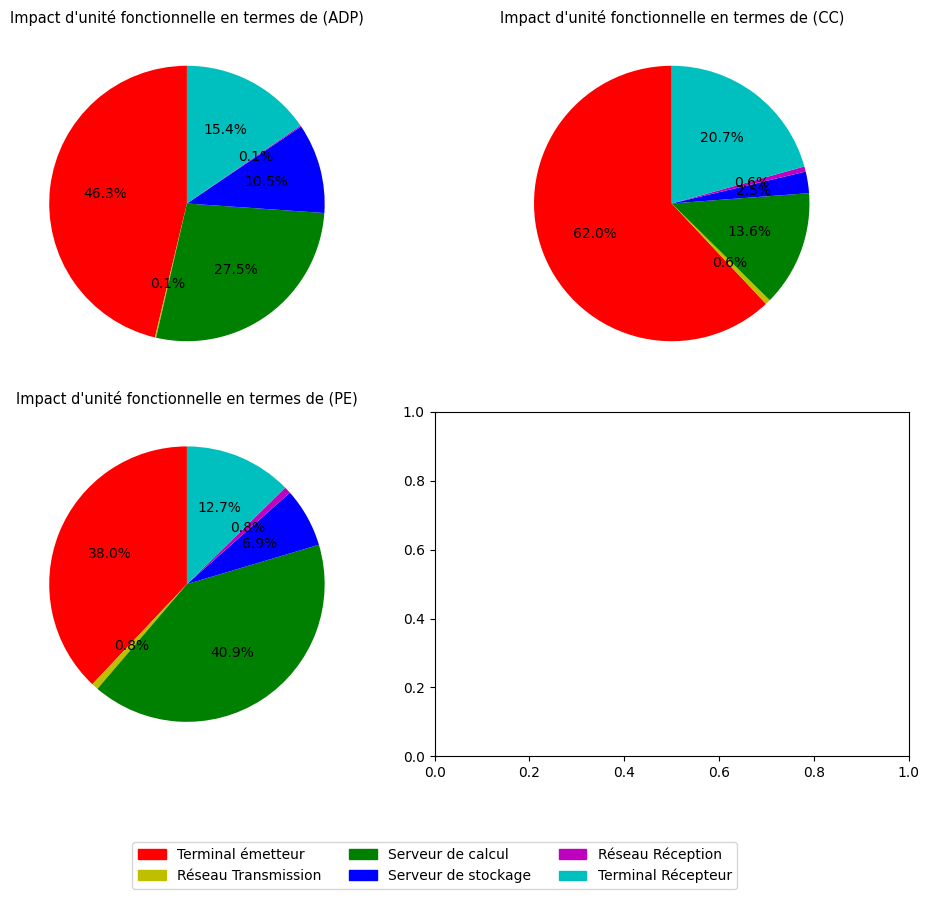

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


# Define labels, slices, and colors for UF ADP
type = ['Terminal émetteur', 'Réseau Transmission', 'Serveur de calcul', 'Serveur de stockage', 'Réseau Réception', 'Terminal Récepteur']

slices_adp = [impact_uf_adp.emetteur_total,
              impact_uf_adp.reseau_trans_total,
              impact_uf_adp.calcul_total,
              impact_uf_adp.stockage_total,
              impact_uf_adp.reseau_recep_total,
              impact_uf_adp.recepteur_total]

slices_pe = [impact_uf_pe.emetteur_total,
             impact_uf_pe.reseau_trans_total,
             impact_uf_pe.calcul_total,
             impact_uf_pe.stockage_total,
             impact_uf_pe.reseau_recep_total,
             impact_uf_pe.recepteur_total]

slices_cc = [impact_uf_cc.emetteur_total,
             impact_uf_cc.reseau_trans_total,
             impact_uf_cc.calcul_total,
             impact_uf_cc.stockage_total,
             impact_uf_cc.reseau_recep_total,
             impact_uf_cc.recepteur_total]

colors = ['r', 'y', 'g', 'b', 'm', 'c']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot UF PE pie chart
axs[0, 0].pie(slices_adp, startangle=90, shadow=False, explode=(0, 0, 0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 0].set_title("Impact d'unité fonctionnelle en termes de (ADP)", fontsize = 10.5)

# Plot UF CC pie chart
axs[0, 1].pie(slices_cc, startangle=90, shadow=False, explode=(0, 0, 0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 1].set_title("Impact d'unité fonctionnelle en termes de (CC)", fontsize = 10.5)

# Plot UF ADP pie chart
axs[1, 0].pie(slices_pe, startangle=90, shadow=False, explode=(0, 0, 0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[1, 0].set_title("Impact d'unité fonctionnelle en termes de (PE)", fontsize = 10.5)

# Create custom legend handles
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, type)]

# Add legend below the plot
fig.legend(handles=legend_handles, labels=type, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Graph plot (Fabrication vs Utilization)

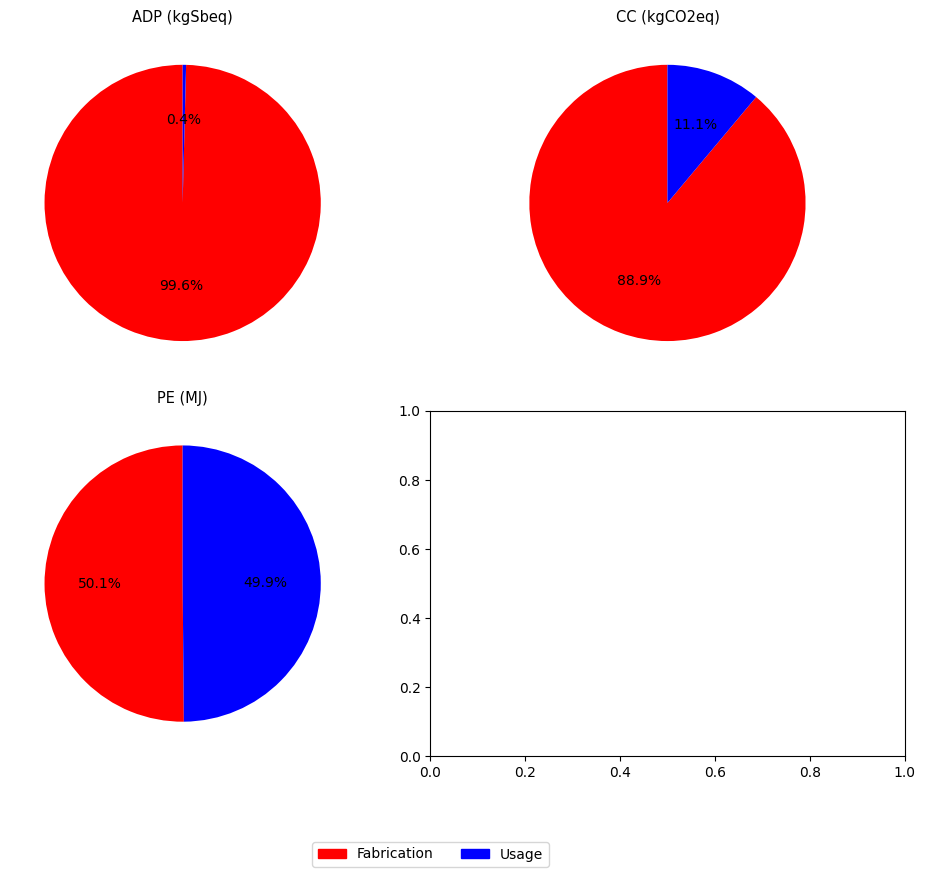

In [87]:

type = ['Fabrication', 'Usage']

slices_adp = [impact_uf_adp.emetteur_fabrication + 
          impact_uf_adp.reseau_trans_fabrication +
          impact_uf_adp.calcul_fabrication +
          impact_uf_adp.stockage_fabrication +
          impact_uf_adp.reseau_recep_fabrication +
          impact_uf_adp.recepteur_fabrication,
          impact_uf_adp.emetteur_usage + 
          impact_uf_adp.reseau_trans_usage +
          impact_uf_adp.calcul_usage +
          impact_uf_adp.stockage_usage +
          impact_uf_adp.reseau_recep_usage +
          impact_uf_adp.recepteur_usage,]

slices_cc = [impact_uf_cc.emetteur_fabrication + 
          impact_uf_cc.reseau_trans_fabrication +
          impact_uf_cc.calcul_fabrication +
          impact_uf_cc.stockage_fabrication +
          impact_uf_cc.reseau_recep_fabrication +
          impact_uf_cc.recepteur_fabrication,
          impact_uf_cc.emetteur_usage + 
          impact_uf_cc.reseau_trans_usage +
          impact_uf_cc.calcul_usage +
          impact_uf_cc.stockage_usage +
          impact_uf_cc.reseau_recep_usage +
          impact_uf_cc.recepteur_usage,]

slices_pe = [impact_uf_pe.emetteur_fabrication + 
          impact_uf_pe.reseau_trans_fabrication +
          impact_uf_pe.calcul_fabrication +
          impact_uf_pe.stockage_fabrication +
          impact_uf_pe.reseau_recep_fabrication +
          impact_uf_pe.recepteur_fabrication,
          impact_uf_pe.emetteur_usage + 
          impact_uf_pe.reseau_trans_usage +
          impact_uf_pe.calcul_usage +
          impact_uf_pe.stockage_usage +
          impact_uf_pe.reseau_recep_usage +
          impact_uf_pe.recepteur_usage,]

colors = ['r', 'b']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot UF PE pie chart
axs[0, 0].pie(slices_adp, startangle=90, shadow=False, explode=(0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 0].set_title("ADP (kgSbeq)", fontsize = 10.5)

# Plot UF CC pie chart
axs[0, 1].pie(slices_cc, startangle=90, shadow=False, explode=(0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 1].set_title("CC (kgCO2eq)", fontsize = 10.5)

# Plot UF ADP pie chart
axs[1, 0].pie(slices_pe, startangle=90, shadow=False, explode=(0, 0), colors=colors, autopct='%1.1f%%')
axs[1, 0].set_title("PE (MJ)", fontsize = 10.5)

# Create custom legend handles
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, type)]

# Add legend below the plot
fig.legend(handles=legend_handles, labels=type, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Graphe de IMPACT UF - Focus sur l'infrastructure de Treebal (Serveurs & stockage)**

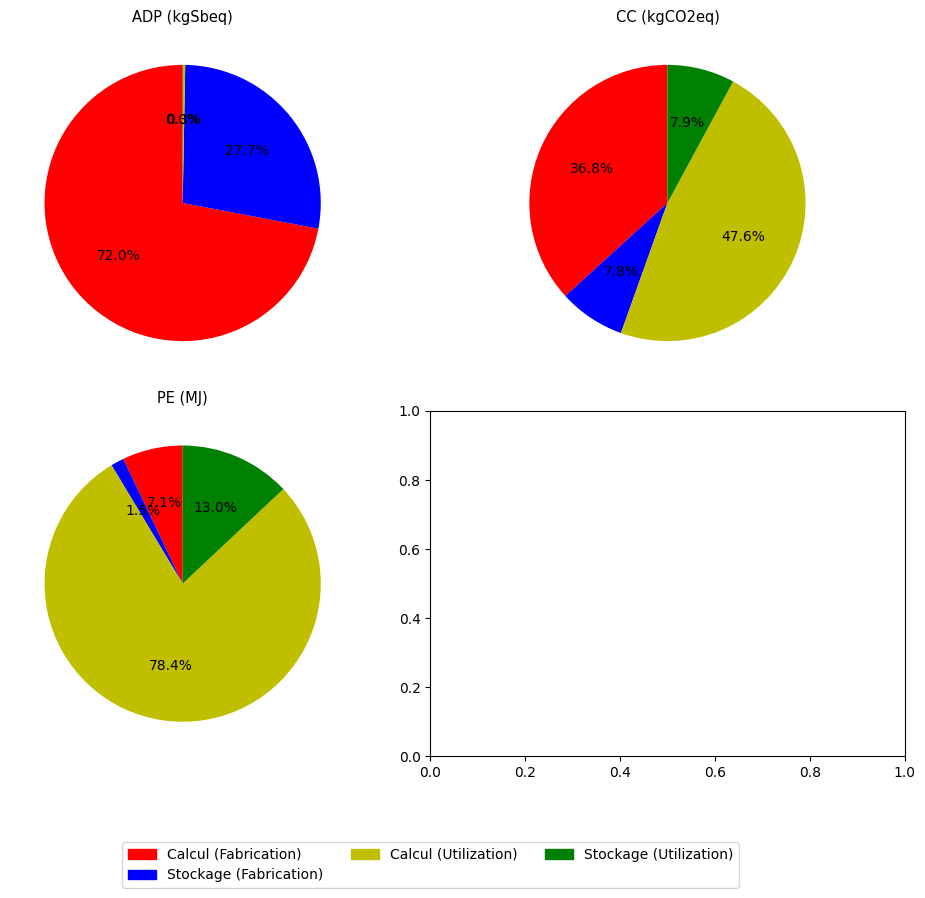

In [88]:

# Define labels, slices, and colors for UF ADP
type = ['Calcul (Fabrication)', 'Stockage (Fabrication)','Calcul (Utilization)', 'Stockage (Utilization)']

slices_adp = [impact_uf_adp.calcul_fabrication,
          impact_uf_adp.stockage_fabrication,
          impact_uf_adp.calcul_usage,
          impact_uf_adp.stockage_usage
          ]

slices_cc = [impact_uf_cc.calcul_fabrication,
          impact_uf_cc.stockage_fabrication,
          impact_uf_cc.calcul_usage,
          impact_uf_cc.stockage_usage]

slices_pe = [impact_uf_pe.calcul_fabrication,
          impact_uf_pe.stockage_fabrication,
          impact_uf_pe.calcul_usage,
          impact_uf_pe.stockage_usage]

colors = ['r', 'b', 'y', 'g']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot UF PE pie chart
axs[0, 0].pie(slices_adp, startangle=90, shadow=False, explode=(0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 0].set_title("ADP (kgSbeq)", fontsize = 10.5)

# Plot UF CC pie chart
axs[0, 1].pie(slices_cc, startangle=90, shadow=False, explode=(0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 1].set_title("CC (kgCO2eq)", fontsize = 10.5)

# Plot UF ADP pie chart
axs[1, 0].pie(slices_pe, startangle=90, shadow=False, explode=(0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[1, 0].set_title("PE (MJ)", fontsize = 10.5)

# Create custom legend handles
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, type)]

# Add legend below the plot
fig.legend(handles=legend_handles, labels=type, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**IMPACT UF 300 caractères 10 destinataires**

In [89]:
smartphone.set_n_destin(10) #Changer le valeur de destinataire

#Initialisation nouveau objet en utilisant le nouveau valeur de destination

impact_uf_adp_ten = impact_UF_ADP()
impact_uf_cc_ten = impact_UF_CC()
impact_uf_pe_ten = impact_UF_PE()

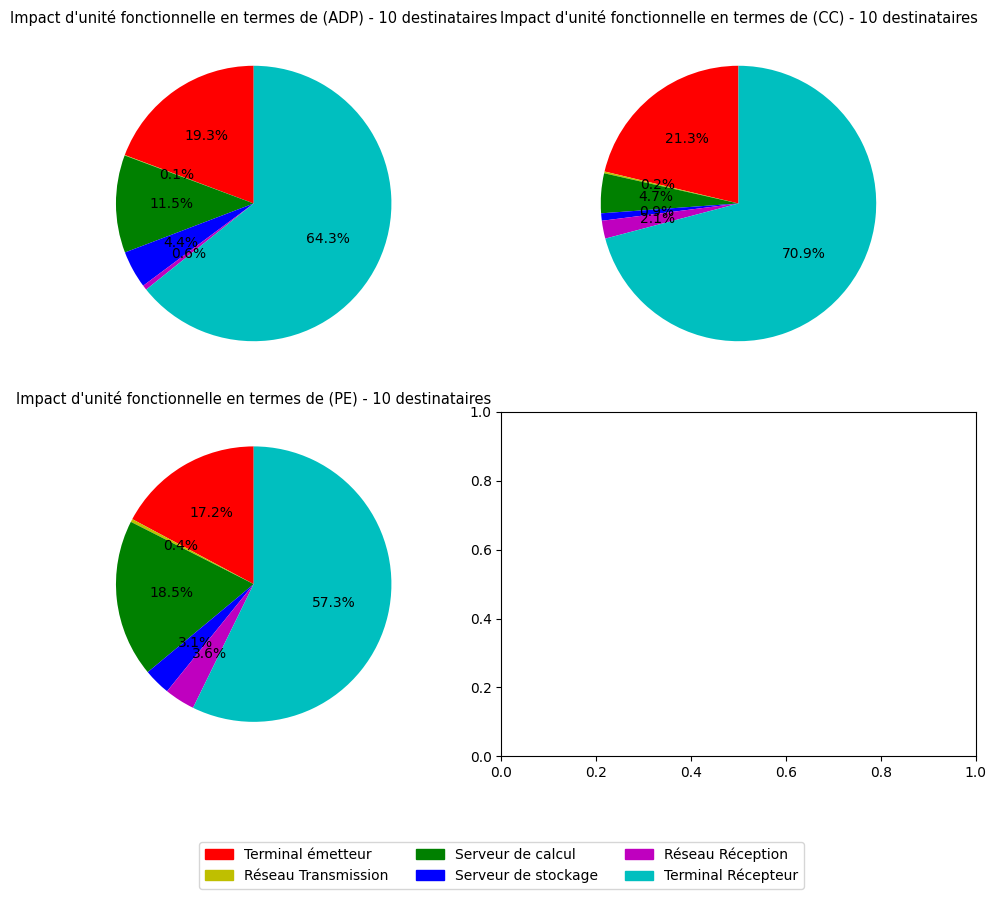

In [90]:

# Define labels, slices, and colors for UF ADP
type = ['Terminal émetteur', 'Réseau Transmission', 'Serveur de calcul', 'Serveur de stockage', 'Réseau Réception', 'Terminal Récepteur']

slices_adp = [impact_uf_adp_ten.emetteur_total,
              impact_uf_adp_ten.reseau_trans_total,
              impact_uf_adp_ten.calcul_total,
              impact_uf_adp_ten.stockage_total,
              impact_uf_adp_ten.reseau_recep_total,
              impact_uf_adp_ten.recepteur_total]

slices_pe = [impact_uf_pe_ten.emetteur_total,
             impact_uf_pe_ten.reseau_trans_total,
             impact_uf_pe_ten.calcul_total,
             impact_uf_pe_ten.stockage_total,
             impact_uf_pe_ten.reseau_recep_total,
             impact_uf_pe_ten.recepteur_total]

slices_cc = [impact_uf_cc_ten.emetteur_total,
             impact_uf_cc_ten.reseau_trans_total,
             impact_uf_cc_ten.calcul_total,
             impact_uf_cc_ten.stockage_total,
             impact_uf_cc_ten.reseau_recep_total,
             impact_uf_cc_ten.recepteur_total]

colors = ['r', 'y', 'g', 'b', 'm', 'c']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot UF PE pie chart
axs[0, 0].pie(slices_adp, startangle=90, shadow=False, explode=(0, 0, 0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 0].set_title("Impact d'unité fonctionnelle en termes de (ADP) - 10 destinataires", fontsize = 10.5)

# Plot UF CC pie chart
axs[0, 1].pie(slices_cc, startangle=90, shadow=False, explode=(0, 0, 0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[0, 1].set_title("Impact d'unité fonctionnelle en termes de (CC) - 10 destinataires", fontsize = 10.5)

# Plot UF ADP pie chart
axs[1, 0].pie(slices_pe, startangle=90, shadow=False, explode=(0, 0, 0, 0, 0, 0), colors=colors, autopct='%1.1f%%')
axs[1, 0].set_title("Impact d'unité fonctionnelle en termes de (PE) - 10 destinataires", fontsize = 10.5)

# Create custom legend handles
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, type)]

# Add legend below the plot
fig.legend(handles=legend_handles, labels=type, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Graphe de IMPACT UF Analyse de sensibilité sur le nombre de destinataires**

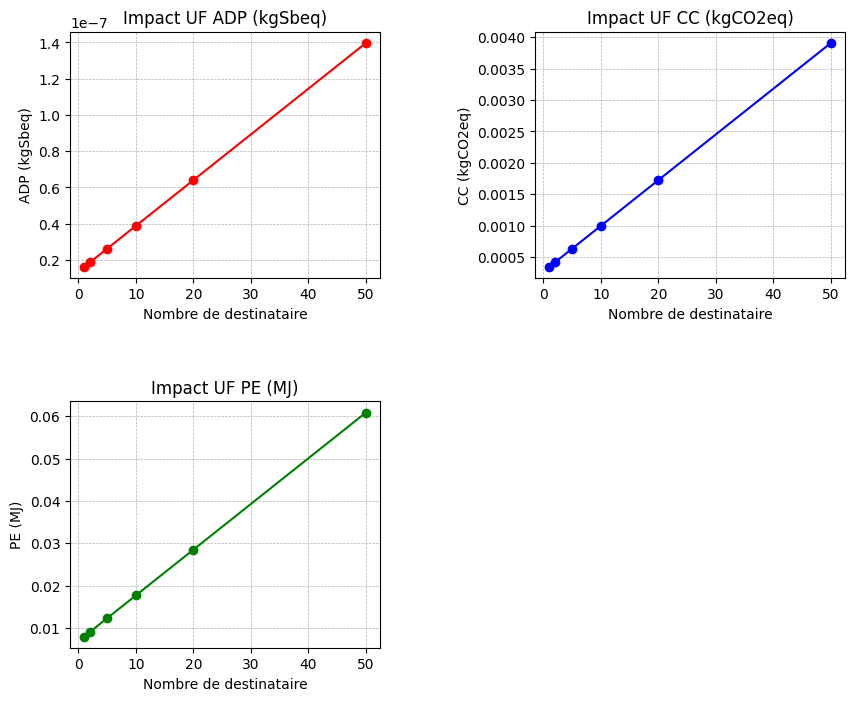

In [91]:
n_destin = [1, 2, 5, 10, 20, 50]  #Nombre de destination teste
result_adp = []
result_cc = []
result_pe = []


for i in n_destin:
    smartphone.set_n_destin(i)
    impact_uf_adp_test = impact_UF_ADP()
    result_adp.append(impact_uf_adp_test.total)
    impact_uf_cc_test = impact_UF_CC()
    result_cc.append(impact_uf_cc_test.total)
    impact_uf_pe_test = impact_UF_PE()
    result_pe.append(impact_uf_pe_test.total)
    
fig = plt.figure(figsize=(10, 8))

plt_adp = fig.add_subplot(221)
plt_cc = fig.add_subplot(222)
plt_pe = fig.add_subplot(223)

plt_adp.plot(n_destin, result_adp, color='r', marker='o')  
plt_cc.plot(n_destin, result_cc, color='b', marker='o')    
plt_pe.plot(n_destin, result_pe, color='g', marker='o')    

# Add grid lines
plt_adp.grid(True, linestyle='--', linewidth=0.5)
plt_cc.grid(True, linestyle='--', linewidth=0.5)
plt_pe.grid(True, linestyle='--', linewidth=0.5)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt_adp.set_title('Impact UF ADP (kgSbeq)')
plt_cc.set_title('Impact UF CC (kgCO2eq)')
plt_pe.set_title('Impact UF PE (MJ)')

plt_adp.set_xlabel('Nombre de destinataire')
plt_cc.set_xlabel('Nombre de destinataire')
plt_pe.set_xlabel('Nombre de destinataire')

plt_adp.set_ylabel('ADP (kgSbeq)')
plt_cc.set_ylabel('CC (kgCO2eq)')
plt_pe.set_ylabel('PE (MJ)')

plt.show()


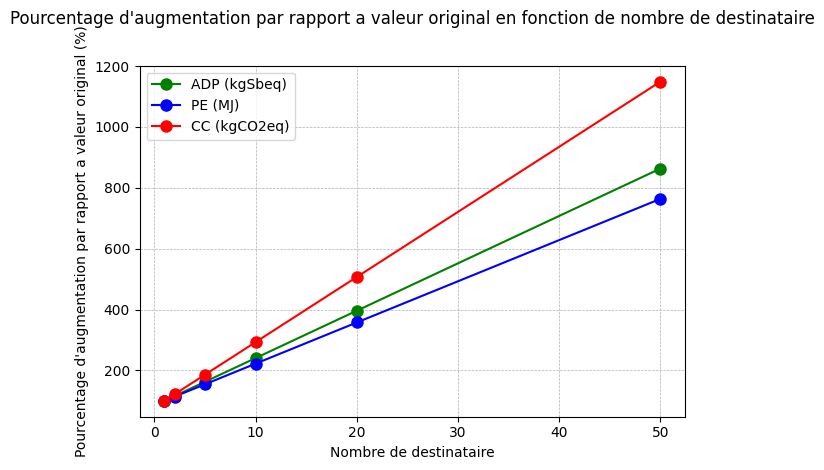

In [92]:
# Calculate ratio for UF ADP
ratio_adp = impact_uf_adp.total / 100
ypoints_adp = np.array(result_adp/ ratio_adp) 

# Plot UF ADP data
plt.plot(n_destin, ypoints_adp, marker='o', markersize=8, linestyle='-', color='g', label='ADP (kgSbeq)')

# Calculate ratio for UF PE
ratio_pe = impact_uf_pe.total / 100
ypoints_pe = np.array(result_pe/ ratio_pe) 

# Plot UF PE data
plt.plot(n_destin, ypoints_pe, marker='o', markersize=8, linestyle='-', color='b', label='PE (MJ)')

# Calculate ratio for UF CC
ratio_cc = impact_uf_cc.total / 100
ypoints_cc = np.array(result_cc/ ratio_cc) 

# Plot UF CC data
plt.plot(n_destin, ypoints_cc, marker='o', markersize=8, linestyle='-', color='r', label='CC (kgCO2eq)')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Nombre de destinataire')
plt.ylabel("Pourcentage d'augmentation par rapport a valeur original (%)")
plt.title("Pourcentage d'augmentation par rapport a valeur original en fonction de nombre de destinataire", pad=30)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


**Impact partie Data Center - Evolution en fonction du nombre de messages**

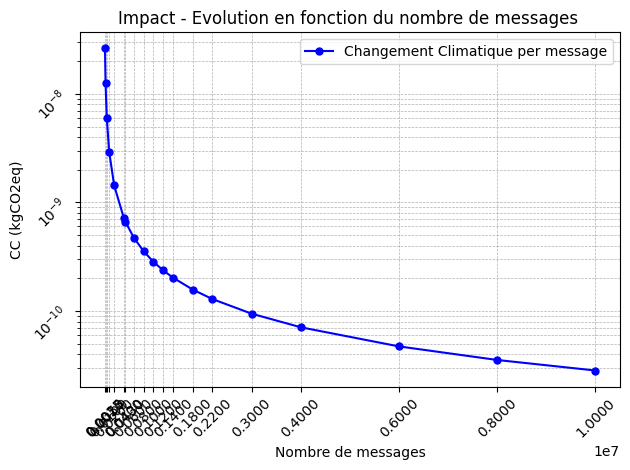

In [93]:
set = []
message = [    #La variable message contient la liste de nombre de message envoye
        13000,
        25000,
        50000,
        100000,
        200000,
        400000,
        430000,
        600000,
        800000,
        1000000,
        1200000,
        1400000,
        1800000,
        2200000,
        3000000,
        4000000,
        6000000,
        8000000,
        10000000
        ]

smartphone.set_n_destin(1)

for i in message:
    donne.set_total_mess_jour(i)
    impact_uf_cc_test = impact_UF_CC()
    set.append((impact_uf_cc_test.total)/i)


plt.plot(message, set, marker='o', markersize=5, linestyle='-', color='b', label='Changement Climatique per message')
plt.yscale('log')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Nombre de messages')
plt.ylabel('CC (kgCO2eq)')
plt.title('Impact - Evolution en fonction du nombre de messages ')

# Customize tick marks
plt.xticks(message, rotation=45)
plt.yticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


**IMPACT UF Analyse de sensibilité sur le % de messages avec PJ (1Mo)**

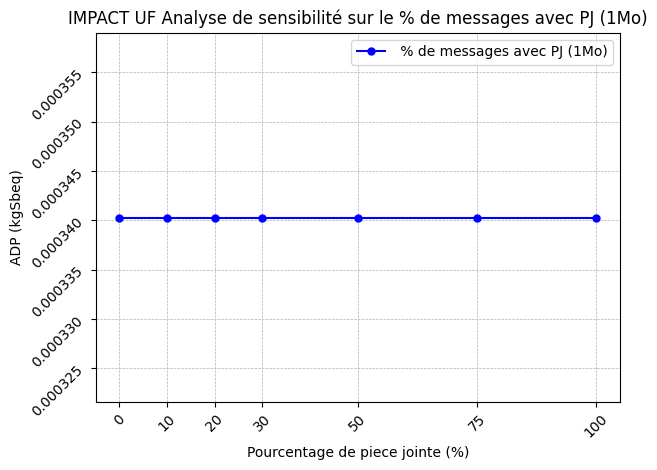

In [94]:
donne.set_total_mess_jour(13000)
set = []
pourcentage_PJ = [
        0,
        10,
        20,
        30,
        50,
        75,
        100
        ]

for i in pourcentage_PJ:
    smartphone.set_percent_PJ(i)
    impact_ann_cc = impact_Annuel_CC()  # Pass updated usage_test here
    impact_uf_cc_test = impact_UF_CC()
    set.append(impact_uf_cc_test.total)

plt.plot(pourcentage_PJ, set, marker='o', markersize=5, linestyle='-', color='b', label=' % de messages avec PJ (1Mo)')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Pourcentage de piece jointe (%)')
plt.ylabel('ADP (kgSbeq)')
plt.title("IMPACT UF Analyse de sensibilité sur le % de messages avec PJ (1Mo)")

# Customize tick marks
plt.xticks(pourcentage_PJ, rotation=45)
plt.yticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()




**IMPACT UF Analyse de sensibilité sur la durée de vie des terminaux**

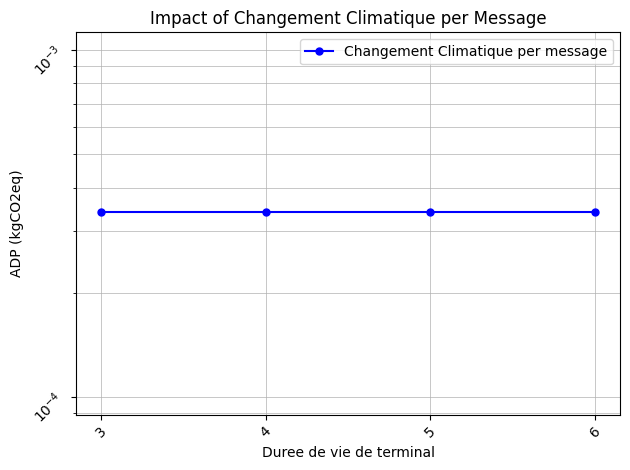

In [95]:
set = []
vie = [3,4,5,6] #La duree de vie teste

for i in vie:
    smartphone.set_duree_vie(i)  #Mettre a jour la duree de vie de terminal
    impact_uf_cc_test = impact_UF_CC()
    set.append(impact_uf_cc_test.total)

plt.plot(vie, set, marker='o', markersize=5, linestyle='-', color='b', label='Changement Climatique per message')
plt.yscale('log')

# Add grid lines
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Add labels and title
plt.xlabel('Duree de vie de terminal')
plt.ylabel('ADP (kgCO2eq)')
plt.title('Impact of Changement Climatique per Message')

# Customize tick marks
plt.xticks(vie, rotation=45)
plt.yticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



**IMPACT UF 300 caractères 1 destinataire & amortissement /durée de possession**

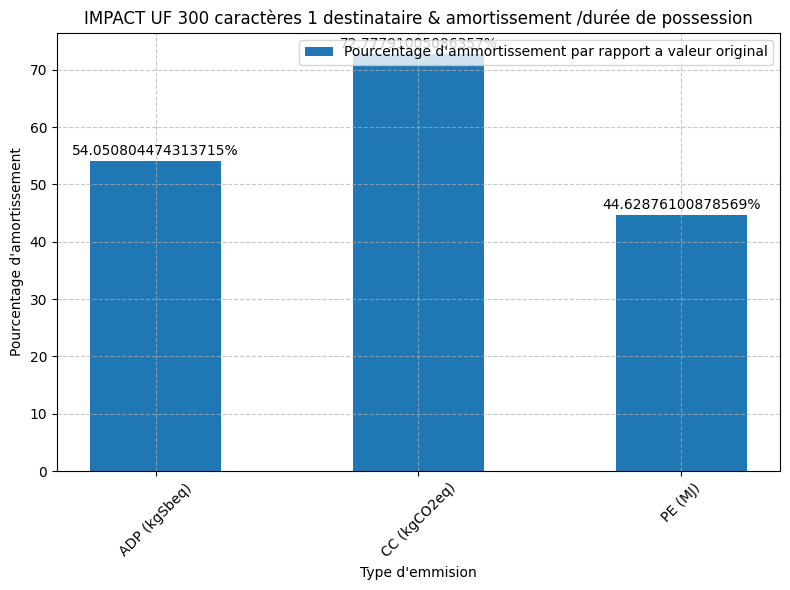

In [96]:
smartphone.set_duree_vie(3) #Reinitialiser la valeur de duree de vie de terminal (defaut) = 3
smartphone.set_duree_globale(1440) #Le valeur de duree globale de terminal 24*60

#On cherche la reduction par rapport a valeur original

impact_uf_adp_1440= impact_UF_ADP()
impact_uf_cc_1440= impact_UF_CC()
impact_uf_pe_1440= impact_UF_PE()

pourcentage_original = [
    100-impact_uf_adp_1440.total *100 / impact_uf_adp.total,
    100-impact_uf_cc_1440.total *100/ impact_uf_cc.total,
    100-impact_uf_pe_1440.total *100 /impact_uf_pe.total]

categories = ['ADP (kgSbeq)', 'CC (kgCO2eq)', 'PE (MJ)']

# Define the width of the bars
bar_width = 0.5

# Create an array of evenly spaced values to position the bars
x = np.arange(len(categories))

# Plotting
plt.bar(x, pourcentage_original, width=bar_width, label="Pourcentage d'ammortissement par rapport a valeur original")

# Add data labels
for i, percentage in enumerate(pourcentage_original):
    plt.text(i, percentage + 1, f'{percentage}%', ha='center')

# Add labels, title, and legend
plt.xlabel("Type d'emmision")
plt.ylabel("Pourcentage d'amortissement")
plt.title('IMPACT UF 300 caractères 1 destinataire & amortissement /durée de possession')
plt.xticks(x, categories, rotation=45)
plt.legend()

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust figure size
plt.gcf().set_size_inches(8, 6)

# Show plot
plt.tight_layout()
plt.show()